<a href="https://colab.research.google.com/github/Pinokcio/Google-Machine-Learning-Bootcamp-2022/blob/main/Kaggle/TPS2022SEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import tensorflow.keras.layers as layers
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [ ]:
file_path = '/content/drive/MyDrive/TPS2022sep/train.csv'

df = pd.read_csv(file_path, encoding='utf8', parse_dates=["date"])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_of_week
df['day_of_month'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.day_of_year
df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]), 1,0)

In [ ]:
df

,row_id,date,country,store,product,num_sold,year,month,day,day_of_week,day_of_month,day_of_year,is_weekend
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,6,1,1,1
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,6,1,1,1
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1,6,1,1,1
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1,6,1,1,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,31,3,31,366,0
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,31,3,31,366,0
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,31,3,31,366,0
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,31,3,31,366,0


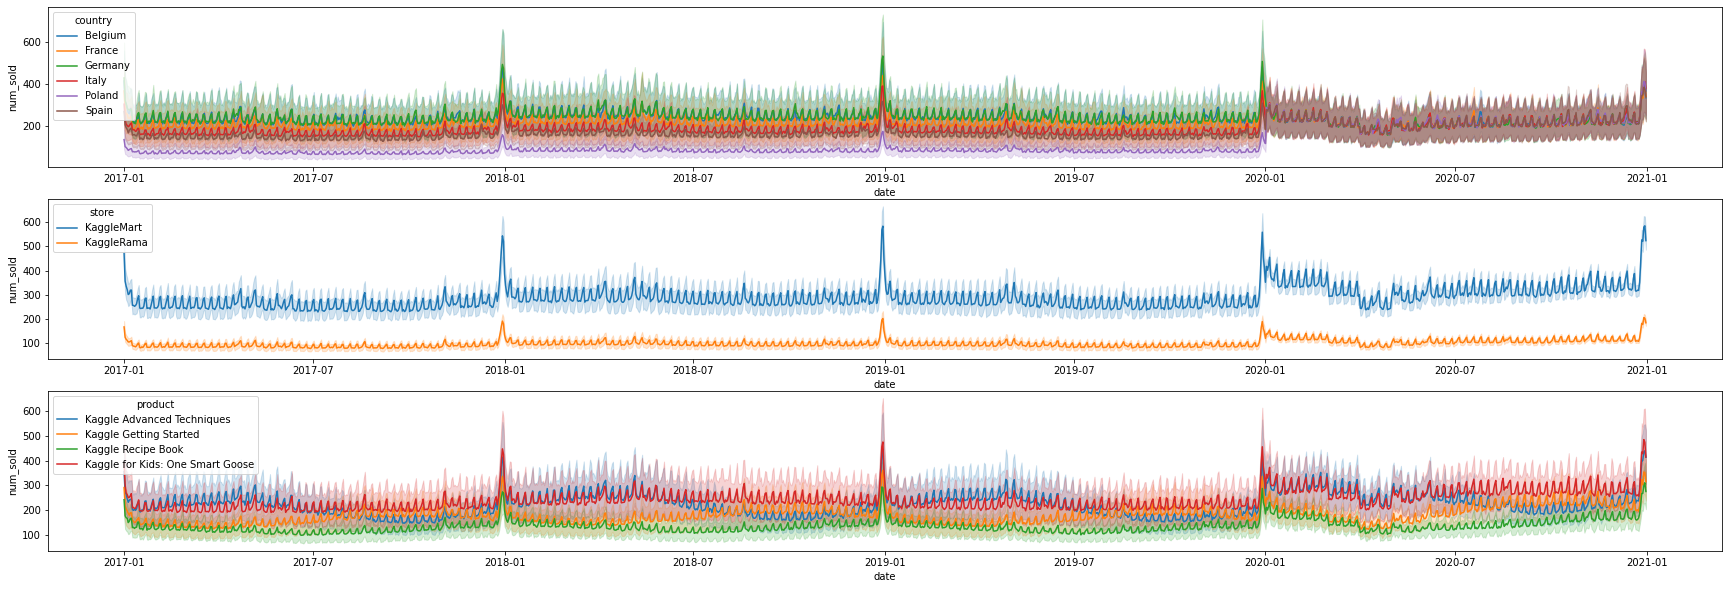

In [ ]:
f,ax = plt.subplots(3, 1, figsize=(30,10))
sns.lineplot(data=df, x="date", y="num_sold", hue="country", ax=ax[0])
sns.lineplot(data=df, x="date", y="num_sold", hue="store", ax=ax[1])
sns.lineplot(data=df, x="date", y="num_sold", hue="product", ax=ax[2])
#2020년을 기점으로 country에 의한 seasonality는 각 features가 합쳐지는 양상을 보임

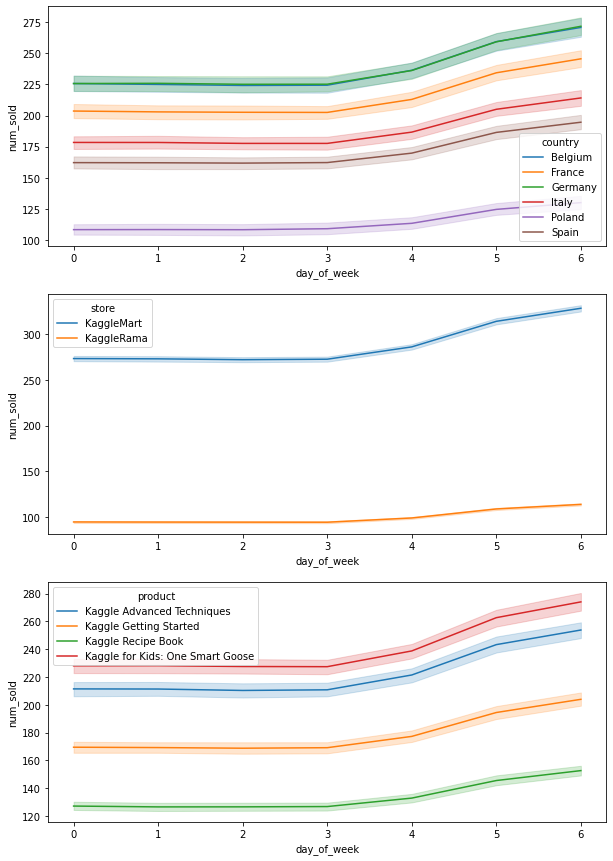

In [ ]:
f,ax = plt.subplots(3, 1, figsize=(10,15))
sns.lineplot(data=df, x="day_of_week", y="num_sold", hue='country', ax=ax[0])
sns.lineplot(data=df, x="day_of_week", y="num_sold", hue='store', ax=ax[1])
sns.lineplot(data=df, x="day_of_week", y="num_sold", hue='product', ax=ax[2])
#주말에 값이 치솟는 경향을 보임

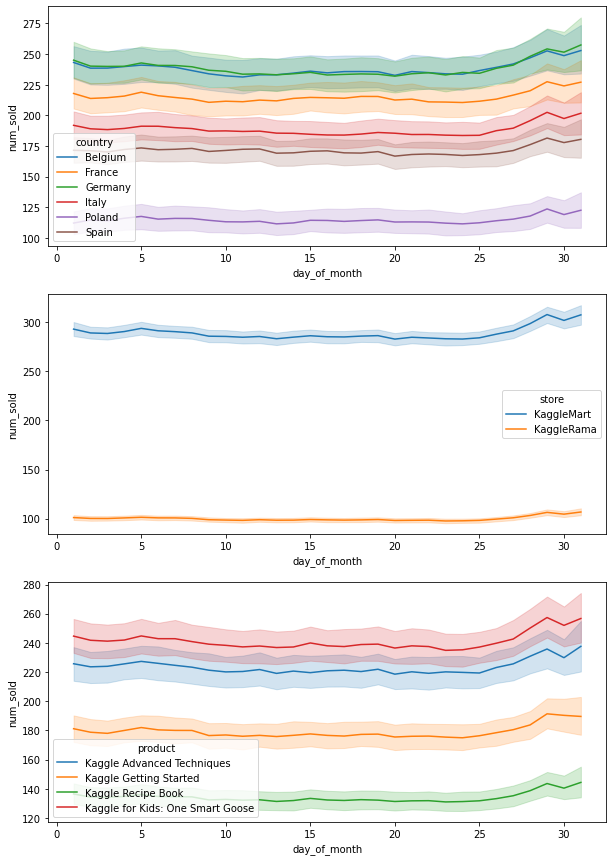

In [ ]:
f,ax = plt.subplots(3, 1, figsize=(10,15))
sns.lineplot(data=df, x="day_of_month", y="num_sold", hue='country', ax=ax[0])
sns.lineplot(data=df, x="day_of_month", y="num_sold", hue='store', ax=ax[1])
sns.lineplot(data=df, x="day_of_month", y="num_sold", hue='product', ax=ax[2])
#25~월말까지 상승하는 추세를 보임, 그러나 미미함

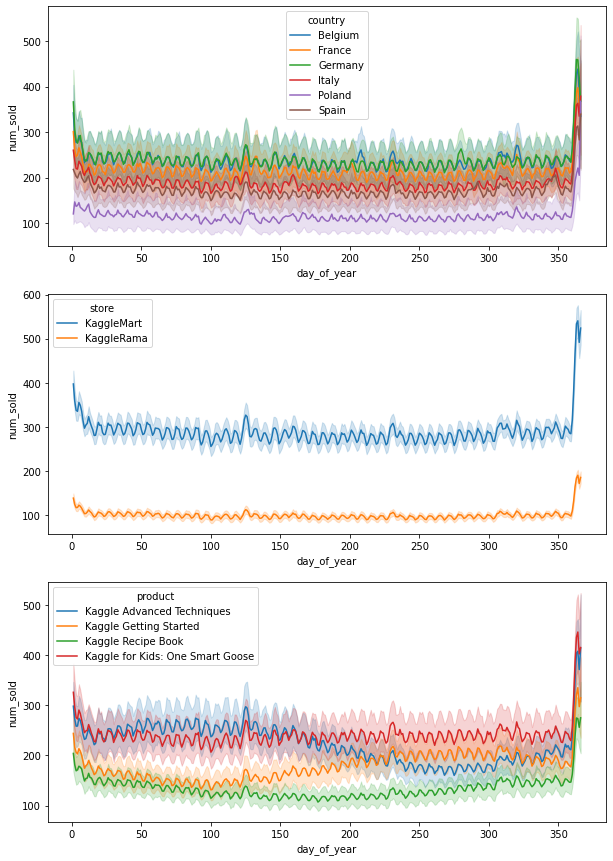

In [ ]:
f,ax = plt.subplots(3, 1, figsize=(10,15))
sns.lineplot(data=df, x="day_of_year", y="num_sold", hue='country', ax=ax[0])
sns.lineplot(data=df, x="day_of_year", y="num_sold", hue='store', ax=ax[1])
sns.lineplot(data=df, x="day_of_year", y="num_sold", hue='product', ax=ax[2])
#연초부터 1, 2번째 주, 연말부터 1, 2번째 주에 값이 치솟는 경향을 보임, 추가로 일부 product에서 중간에 다른 trend를 보이기도 함

In [ ]:
from sklearn.preprocessing import StandardScaler

n_scaler = StandardScaler()

temp1 = np.array(np.log(df['num_sold'])).reshape(-1, 1)
n_scaler.fit(temp1)
temp1 = n_scaler.transform(temp1)
temp1.reshape(-1)

array([ 2.08654502,  1.97854905,  1.62240349, ...,  0.02559956,
       -0.20047281,  0.37863613])

In [ ]:
temp, lam = boxcox(df['num_sold'])

(array([  14.,   77.,  157.,  216.,  259.,  271.,  348.,  241.,  380.,
         466.,  575.,  719.,  808.,  806., 1168., 1348., 1566., 2063.,
        2607., 2688., 2567., 2850., 3225., 3248., 3040., 3464., 2550.,
        2170., 1717., 1783., 1709., 2076., 2377., 2441., 2593., 2695.,
        2695., 2579., 2594., 2057., 1476.,  786.,  351.,  152.,   79.,
          31.,   22.,   13.,    7.,    4.]),
 array([-3.01823332, -2.90473122, -2.79122912, -2.67772703, -2.56422493,
        -2.45072283, -2.33722074, -2.22371864, -2.11021654, -1.99671444,
        -1.88321235, -1.76971025, -1.65620815, -1.54270606, -1.42920396,
        -1.31570186, -1.20219977, -1.08869767, -0.97519557, -0.86169347,
        -0.74819138, -0.63468928, -0.52118718, -0.40768509, -0.29418299,
        -0.18068089, -0.0671788 ,  0.0463233 ,  0.1598254 ,  0.2733275 ,
         0.38682959,  0.50033169,  0.61383379,  0.72733588,  0.84083798,
         0.95434008,  1.06784217,  1.18134427,  1.29484637,  1.40834847,
         1.52185

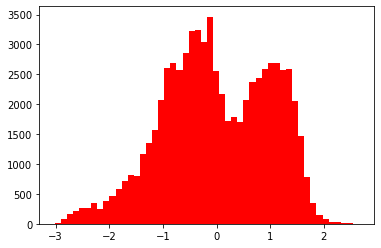

In [ ]:
plt.hist(temp1, bins = 50 ,color = 'r')

(array([5.000e+01, 1.110e+02, 1.920e+02, 3.700e+02, 3.870e+02, 3.550e+02,
        4.980e+02, 5.810e+02, 6.240e+02, 9.720e+02, 9.960e+02, 1.114e+03,
        1.603e+03, 1.897e+03, 2.065e+03, 3.046e+03, 2.670e+03, 3.268e+03,
        3.217e+03, 3.081e+03, 3.060e+03, 3.343e+03, 3.028e+03, 2.437e+03,
        1.807e+03, 1.612e+03, 1.727e+03, 1.780e+03, 2.137e+03, 2.121e+03,
        2.343e+03, 2.335e+03, 2.348e+03, 2.429e+03, 2.225e+03, 2.352e+03,
        2.021e+03, 1.544e+03, 1.157e+03, 5.790e+02, 2.980e+02, 1.570e+02,
        8.700e+01, 3.600e+01, 2.700e+01, 1.600e+01, 1.000e+01, 7.000e+00,
        5.000e+00, 3.000e+00]),
 array([ 3.66788291,  3.83055484,  3.99322678,  4.15589871,  4.31857065,
         4.48124258,  4.64391452,  4.80658645,  4.96925838,  5.13193032,
         5.29460225,  5.45727419,  5.61994612,  5.78261806,  5.94528999,
         6.10796192,  6.27063386,  6.43330579,  6.59597773,  6.75864966,
         6.9213216 ,  7.08399353,  7.24666546,  7.4093374 ,  7.57200933,
         7.

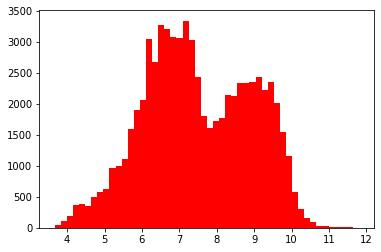

In [ ]:
plt.hist(temp, bins = 50 ,color = 'r')

In [ ]:
df['num_sold'] = temp

In [ ]:
train = df
#train = df[:int(df.shape[0]*0.8)]
train_x = train[['country', 'store', 'product', 'year', 'month', 'day', 'day_of_week', 'day_of_year', 'is_weekend']]
train_y = list(train['num_sold'])
train_x = pd.get_dummies(train_x, ['country', 'store', 'product'])

#valid = df[int(df.shape[0]*0.8):]
#valid_x = valid[['country', 'store', 'product', 'year', 'month', 'day', 'day_of_week', 'day_of_year', 'is_weekend']]
#valid_y = list(valid['num_sold'])
#valid_x = pd.get_dummies(valid_x, ['country', 'store', 'product'])

In [ ]:
#!pip install catboost

In [ ]:
import xgboost as xg
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV , cross_val_score ,cross_validate
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

In [ ]:
pipeline_cat = Pipeline([('transformer', s_scaler), ('CatBoostRegressor', CatBoostRegressor(verbose=0))])
pipeline_xgbr = Pipeline([('transformer', s_scaler), ('XGBRegressor', xg.XGBRegressor(verbose=0))])
pipeline_lgbm = Pipeline([('transformer', s_scaler), ('LGBMRegressor', lgb.LGBMRegressor(verbose=0))])

pipelines = [pipeline_cat, pipeline_xgbr, pipeline_lgbm ]

pipe_dict = {0: 'CatBoostRegressor',1: 'XGBRegressor', 2 : 'LGBMRegressor'}

In [ ]:
original_results = dict()
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, train_x, train_y, cv=5, scoring='r2')
    original_results[pipe_dict[i]] = cv_score

[11:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
original_results

{'CatBoostRegressor': array([0.98158392, 0.99039838, 0.99038998, 0.97884992, 0.95285355]),
 'XGBRegressor': array([0.96077941, 0.9696893 , 0.97487095, 0.96267289, 0.93188177]),
 'LGBMRegressor': array([0.9850944 , 0.98688457, 0.98496337, 0.97217248, 0.95565473])}

In [ ]:
results = dict()

#USING GRID SEARCH
params = {'CatBoostRegressor__depth': [2,4,6,8,10], 'CatBoostRegressor__learning_rate': [0.05, 0.1, 0.15], 'CatBoostRegressor__iterations': [100, 500, 1000]}

grid_search_catb = GridSearchCV(estimator=pipeline_cat, param_grid=params, verbose = 1, cv = 5, n_jobs=-1).fit(train_x, train_y)
catb_best = grid_search_catb.best_estimator_
print('catb Regressor Best Parmas',grid_search_catb.best_params_)
results['catb Regressor Accuracy'] = cross_val_score(catb_best,train_x, train_y, cv=5, scoring='neg_mean_absolute_error').mean()
print('catb Regressor Accuracy', results['catb Regressor Accuracy'])

Fitting 5 folds for each of 45 candidates, totalling 225 fits
catb Regressor Best Parmas {'CatBoostRegressor__depth': 4, 'CatBoostRegressor__iterations': 1000, 'CatBoostRegressor__learning_rate': 0.15}
catb Regressor Accuracy -0.14260140343741345


In [ ]:
pipeline = Pipeline([('transformer', s_scaler), ('estimator', catb_best)])
cv_results = cross_validate(pipeline, train_x, train_y, cv=5, scoring='r2', return_train_score=True, return_estimator=True)
np.mean(cv_results['test_score'])

0.9820332497956201

In [ ]:
test_file_path = '/content/drive/MyDrive/TPS2022sep/test.csv'

test_file = pd.read_csv(test_file_path, encoding='utf8', parse_dates=["date"])

In [ ]:
test_file['year'] = test_file['date'].dt.year
test_file['month'] = test_file['date'].dt.month
test_file['day'] = test_file['date'].dt.day
test_file['day_of_week'] = test_file['date'].dt.day_of_week
test_file['day_of_month'] = test_file['date'].dt.day
test_file['day_of_year'] = test_file['date'].dt.day_of_year
test_file['is_weekend'] = np.where(test_file['day_of_week'].isin([5,6]), 1,0)
test_x = test_file[['country', 'store', 'product', 'year', 'month', 'day', 'day_of_week', 'day_of_year', 'is_weekend']]
test_x = np.array(pd.get_dummies(test_x, ['country', 'store', 'product']))

In [ ]:
scores = [np.zeros(test_x.shape[0]) for _ in range(len(cv_results['estimator']))]
for e, estimator in enumerate(cv_results['estimator']):
    scores[e] = estimator.predict(test_x)

answer = pd.Series(inv_boxcox(np.mean(scores, axis=0), lam))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid 

In [ ]:
answer

0        491.030181
1        391.042745
2        330.675484
3        537.450983
4        168.220539
            ...    
17515    613.042619
17516    203.794446
17517    160.050755
17518    136.558488
17519    214.593329
Length: 17520, dtype: float64

In [ ]:
cv = pd.concat([test_file['row_id'], answer], axis=1, ignore_index=True)

In [ ]:
cv.to_csv('/content/drive/MyDrive/TPS2022sep/submission.csv', header=['row_id', 'num_sold'], index=False)